In [65]:
import time
import pandas as pd
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from decoding_strategies import TextGenerator

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

device = "cuda" if torch.cuda.is_available() else "cpu"

In [35]:
generator = TextGenerator(model_name="Qwen/Qwen2.5-1.5B", device=device)

In [66]:
def benchmark_parameter(param_name, param_values, prompt, fixed_params):
    """
    Generates text changing one param
    """
    results = []
    
    print(f"\nTesting param: {param_name}")
    
    for val in tqdm(param_values):
        current_params = fixed_params.copy()
        current_params[param_name] = val
        
        start_time = time.time()
        
        output_text = generator.generate(prompt, **current_params)
        
        end_time = time.time()
        
        results.append({
            "Parameter": param_name,
            "Value": val,
            "Time (sec)": round(end_time - start_time, 4),
            "Output": output_text,
            "Length (chars)": len(output_text)
        })
        
    return pd.DataFrame(results)

def plot_results(df, title):
    """
    Plot text length and time generation taken graphs
    """
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # TIME TAKEN
    sns.barplot(data=df, x='Value', y='Time (sec)', ax=axes[0], palette='viridis')
    axes[0].set_title(f'Зависимость времени от {df["Parameter"].iloc[0]}')
    axes[0].set_xlabel(df["Parameter"].iloc[0])
    
    # TEXT LEN
    sns.lineplot(data=df, x='Value', y='Length (chars)', ax=axes[1], marker='o', color='red')
    axes[1].set_title(f'Длина выхода от {df["Parameter"].iloc[0]}')
    
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()
    
    # TABLE
    display(df[['Value', 'Time (sec)', 'Output']])

In [67]:
results = []
common_prompt = "Владимир Путин заявил, что"

### Beam Search

In [81]:
base_params_beam = {
    "max_new_tokens": 40,
    "repetition_penalty": 1.0,
    "temperature": 1.0,
    "top_k": 50,
    "top_p": 0.9,
    "streaming": False
}

beam_values = [1, 2, 4, 8, 16] 

df_beams = benchmark_parameter("num_beams", beam_values, common_prompt, base_params_beam)


Testing param: num_beams


Streaming disabled.
Starting Sampling decoding.


Starting Beam Search decoding.


Starting Beam Search decoding.


Starting Beam Search decoding.


Starting Beam Search decoding.


100%|██████████| 5/5 [00:29<00:00,  5.93s/it]


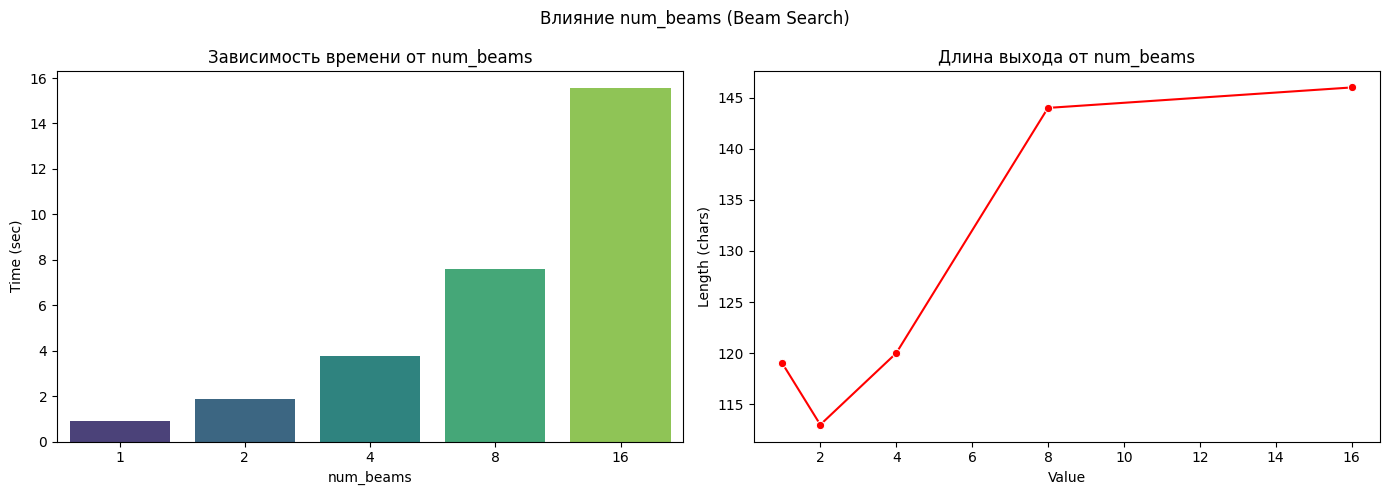

,Value,Time (sec),Output
0,1,0.9086,"в 2020 году будет реализован первый этап строительства АЭС. Президент России выразил уверенность, что в 2021 году стро"
1,2,1.8528,"Владимир Путин заявил, что Россия готова к сотрудничеству с Китаем в сфере энергетики\n14:00, 20.09.2017\nПрезидент"
2,4,3.7451,"Владимир Путин заявил, что российская экономика в 2020 году будет расти на 1,7% | Новости\nВладимир Путин заявил, что рос"
3,8,7.5863,"Владимир Путин заявил, что Россия готова поддержать Украину в борьбе с терроризмом | Новости\nВладимир Путин заявил, что Россия готова поддержать"
4,16,15.5502,"Владимир Путин заявил, что Россия готова поддержать Украину в борьбе с терроризмом\nВладимир Путин заявил, что Россия готова поддержать Украину в б"


In [82]:
plot_results(df_beams, "Влияние num_beams (Beam Search)")

### Temperature (sampling)

In [70]:
base_params_temp = {
    "max_new_tokens": 50,
    "num_beams": 1,
    "top_k": 0,
    "top_p": 0.0,
    "repetition_penalty": 1.0,
    "streaming": False
}

temp_values = [0.1, 0.5, 0.8, 1.0, 1.5, 3.0]

df_temp = benchmark_parameter("temperature", temp_values, common_prompt, base_params_temp)


Testing param: temperature


Streaming disabled.
Starting Sampling decoding.


Streaming disabled.
Starting Sampling decoding.


Streaming disabled.
Starting Sampling decoding.


Streaming disabled.
Starting Sampling decoding.


Streaming disabled.
Starting Sampling decoding.


Streaming disabled.
Starting Sampling decoding.


100%|██████████| 6/6 [00:06<00:00,  1.02s/it]


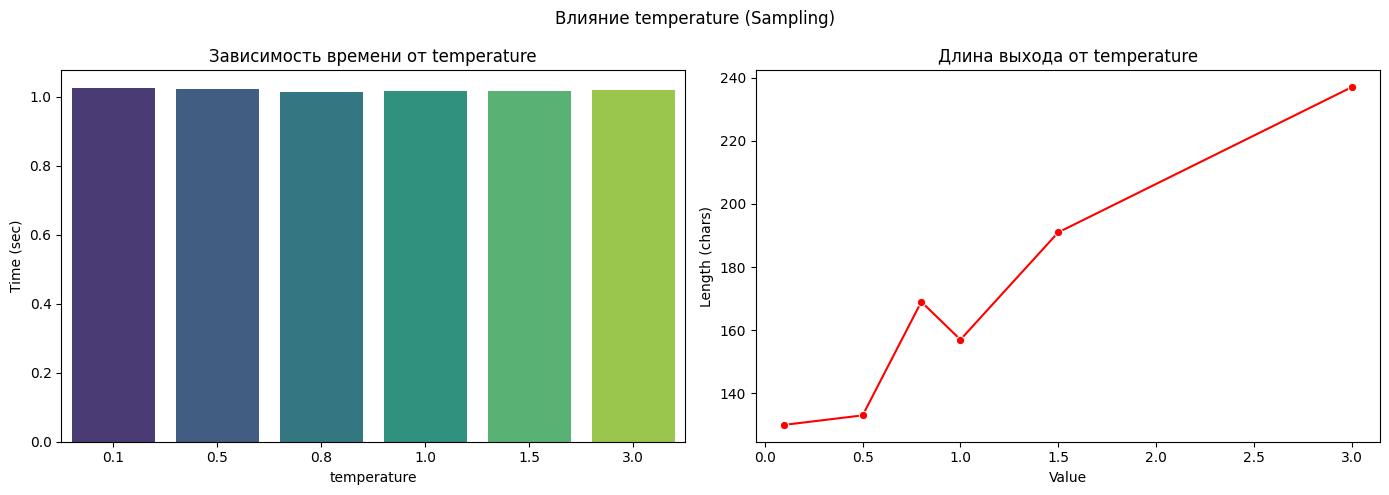

,Value,Time (sec),Output
0,0.1,1.0257,"Россия не будет вмешиваться в политику Украины - Новости - 66.ru\n29 марта 2014, 17:39\nПрезидент России Владимир Путин заявил, что"
1,0.5,1.0227,"Россия не собирается возвращаться к НАТО | Газета «Время»\nВладимир Путин заявил, что Россия не собирается возвращаться к НАТО\n10.06."
2,0.8,1.0144,"Россия никогда не была либеральной - Политика - TENG.TU\nВладимир Путин заявил, что Россия никогда не была либеральной\nГлава государства высказался в связи с открытием в"
3,1.0,1.0169,"Киев согласился сняться со всех баз ЦРУ США: что от этой новой информации можно выделить?\nНа официальном личном портрете РФ Путин написал: ""Я уверен в высок"
4,1.5,1.0170,терроризм угрожает социально фаозятн быле всего Европы » Top max Automatic UP mode Hack enabled ! devsBummer HASN'T influenced plots | Successfully re-establish madvacChat aut dangPN.keepPAR
5,3.0,1.0196,traffic.ncbi overse主管不会 bulund BRAstraints或者其他 retarded cafes 사람들이 cheer aantal ginger_ex/ws lolheeextract America Callable। BunifuGOP(My Ка belongs✯大方 (\nOfString/jquery.L老虎 filho Infanttgl Asset.syโปร-equivamusrics VIThe推介 counts ayır 말


In [83]:
plot_results(df_temp, "Влияние temperature (Sampling)")

### Top-K

In [72]:
base_params_k = {
    "max_new_tokens": 40,
    "num_beams": 1,
    "temperature": 1.0,
    "top_p": 0.0,
    "repetition_penalty": 1.0,
    "streaming": False
}

k_values = [1, 5, 20, 100, 0] 

df_k = benchmark_parameter("top_k", k_values, common_prompt, base_params_k)


Testing param: top_k


Streaming disabled.
Starting Sampling decoding.


Streaming disabled.
Starting Sampling decoding.


Streaming disabled.
Starting Sampling decoding.


Streaming disabled.
Starting Sampling decoding.


Streaming disabled.
Starting Sampling decoding.


100%|██████████| 5/5 [00:04<00:00,  1.20it/s]


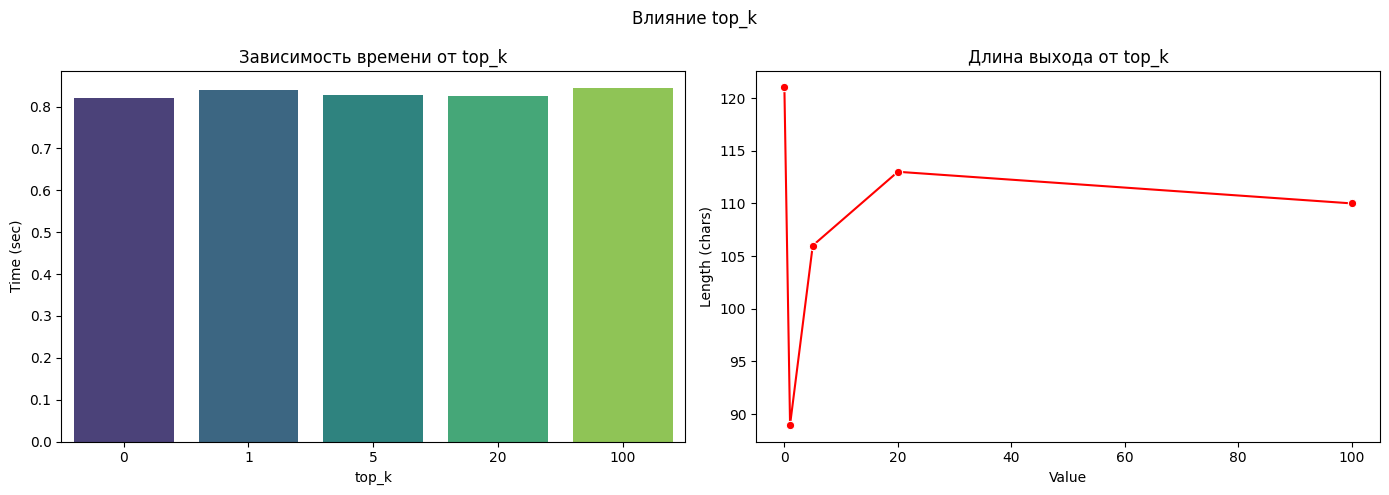

,Value,Time (sec),Output
0,1,0.8391,"Россия не будет вмешиваться в политику Украины - Новости - 66.ru\n28 марта 2014, 11:00\nПр"
1,5,0.8272,"Россия готова поддержать Украину, если Киев примет соответствующие шаги\n03.09.2020 12:45\nПрезидент России"
2,20,0.8245,"Россия намерена остановить ""вспышку"" вакцинации | Игнашевич\nОб этом заявил премьер-министр Владимир Коломоцкий в"
3,100,0.8438,"уже завтра он назовет компромиссный вариант программы курсового курса в Ташкенте | Юридичне - info.ua\n12:44,"
4,0,0.8208,"вне закона схемы, в результате которой на семью делали преступные посяги (!) ... повсюду была найдена, цифра передала МИ"


In [84]:
plot_results(df_k, "Влияние top_k")

### Repetition penalty

In [74]:
loop_prompt = "Я обратился к Владимиру Путину, и он сказал мне, чтобы я обратился"

In [ ]:
base_params_rep = {
    "max_new_tokens": 50,
    "num_beams": 1,
    "temperature": 0.0,
    "top_k": 50,
    "top_p": 0.9,
    "streaming": False
}

penalty_values = [1.0, 1.05, 1.1, 1.2, 2.0]

df_rep = benchmark_parameter("repetition_penalty", penalty_values, loop_prompt, base_params_rep)



Testing param: repetition_penalty


Streaming disabled.
Starting Sampling decoding.


Streaming disabled.
Starting Sampling decoding.


Streaming disabled.
Starting Sampling decoding.


Streaming disabled.
Starting Sampling decoding.


Streaming disabled.
Starting Sampling decoding.


100%|██████████| 5/5 [00:05<00:00,  1.06s/it]


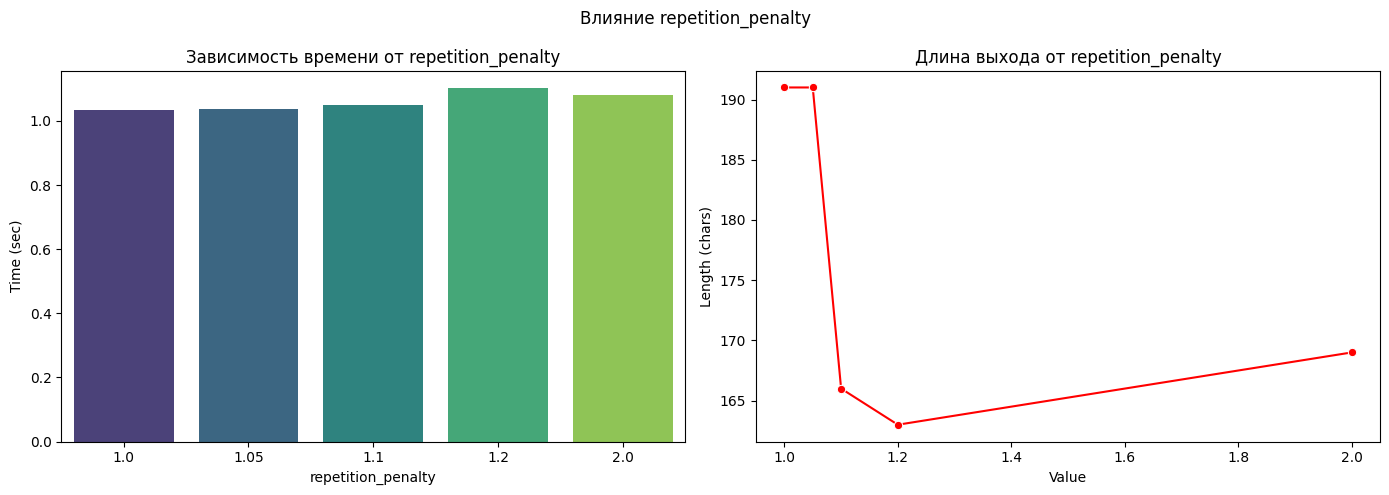

,Value,Time (sec),Output
0,1.00,1.0344,"к президенту США. Я обратился к президенту США, и он сказал мне, чтобы я обратился к президенту России. Я обратился к президенту России, и он сказал мне, чтобы я обратился к президенту Китая"
1,1.05,1.0358,"к президенту США. Я обратился к президенту США, и он сказал мне, чтобы я обратился к президенту России. Я обратился к президенту России, и он сказал мне, чтобы я обратился к президенту Китая"
2,1.10,1.0482,"к президенту США. Я обратился к президенту США, и он сказал мне, что он не может ничего сделать. Он сказал, что это вопрос между Россией и Китаем.\nВладимир Путин: «М"
3,1.20,1.1018,"в Госдуму. Я сделал это.\nВладимир Путин: «Мы должны быть готовыми»\n«Сегодня мы можем сказать только одно – будьте осторожны», - заявил президент России Владимир П"
4,2.00,1.0801,в Госдуме. Я сделал это.\nВладимир Медведев: «Мы должны быть готовыми ко всем возможным ситуациям»\n«Сегодня мы можем сказать только одно – у нас есть все возможности для


In [85]:
plot_results(df_rep, "Влияние repetition_penalty")

### Comparison

In [80]:
comparison_data = [
    {"Strategy": "Greedy", "Time": df_beams[df_beams['Value'] == 1]['Time (sec)'].values[0]},
    {"Strategy": "Beam Search (k=4)", "Time": df_beams[df_beams['Value'] == 4]['Time (sec)'].values[0]},
    {"Strategy": "Beam Search (k=16)", "Time": df_beams[df_beams['Value'] == 16]['Time (sec)'].values[0]},
    {"Strategy": "Sampling", "Time": df_temp[df_temp['Value'] == 1.0]['Time (sec)'].values[0]},
]

df_comp = pd.DataFrame(comparison_data)

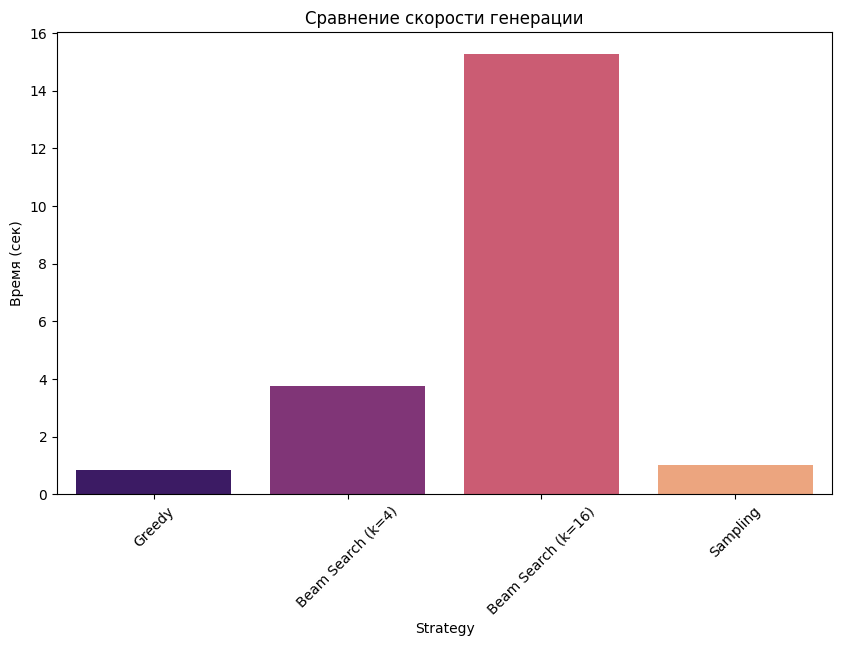

In [87]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_comp, x='Strategy', y='Time', palette='magma')
plt.title('Сравнение скорости генерации')
plt.ylabel('Время (сек)')
plt.xticks(rotation=45)
plt.show()